# ST 4035 - Assigment 1 -  s15352

## Part A

### Import Libraries

In [321]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from scipy.stats import normaltest
import statsmodels.api as sm

### Import Data Set 

In [322]:
df=pd.read_csv(r'D:\UOC FOS\Degree Programe\Applied Statistics Hons Degree Programm\Level 4\Sem 1\Statistics\ST 4035\Week 01\Assigment\train.csv')

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_16848\3638433805.py:1: DtypeWarning: Columns (494,597,599,600,601,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'D:\UOC FOS\Degree Programe\Applied Statistics Hons Degree Programm\Level 4\Sem 1\Statistics\ST 4035\Week 01\Assigment\train.csv')


In [323]:
df.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


### Remove duplicates

In [324]:
df.drop_duplicates()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1383,2019,8,4,2,2,2,1,62,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1383,1384,2018,11,7,1,2,2,2,59,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1384,1385,2017,9,5,1,2,1,1,56,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1385,1386,2019,4,4,2,2,2,1,61,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


### Check the missing values in each column

In [325]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ID                                                0
Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 806, dtype: int64


In [326]:
df.dtypes

ID                                               int64
Year                                             int64
Month                                            int64
Hospital                                         int64
Sample                                           int64
                                                ...   
FU_L.interrogansserovarAustralisstr.Ballico    float64
FU_L.interrogansserovarwolfiistr.3705          float64
FU_L.interrogansserovarWeerasinghe             float64
FU_Patoc                                       float64
Final                                            int64
Length: 806, dtype: object

### Replace both colums containing (99) as missing values

In [327]:
cols_to_replace = df.columns[df.isin(['99', 99, 99.0]).any()].tolist()
cols_to_replace = [col for col in cols_to_replace if col not in ['ID']]
df[cols_to_replace] = df[cols_to_replace].replace(['99', 99, 99.0], np.nan)

### Drop Colums more than 80% missing values

In [328]:
# Calculate percentage of missing values per column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Filter columns with more than 30% missing values
columns_to_drop = missing_percentages[missing_percentages > 80].index

# Drop the columns
df_cleaned = df.drop(columns_to_drop, axis=1)

In [329]:
df_cleaned.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,Acu_L.interrogansserovarMankarsostr.Mankarso,Acu_L.santarosaiserovarGeorgiastr.LT117,Acu_L.santarosaiserovarPyrogenesstr.Salinem,Acu_L.interrogansserovarBataviaestr.VanTienan,Acu_L.interrogansserovarAlexistr.616,Acu_L.interrogansserovarAustralisstr.Ballico,Acu_L.interrogansserovarwolfiistr.3705,Acu_L.interrogansserovarWeerasinghe,Acu_Patoc,Final
0,1,2018,11,7,1,2.0,2.0,2.0,53.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2,2018,1,7,1,2.0,2.0,1.0,17.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2.0,2.0,1.0,47.0,1.0,...,0.0,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,2
3,4,2018,1,7,1,2.0,2.0,1.0,21.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [330]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 467 entries, ID to Final
dtypes: float64(460), int64(7)
memory usage: 4.9 MB


### After Replacing 99 as missing value checking data set

In [331]:
missing_values_count = df_cleaned.isnull().sum()
print(missing_values_count)

ID                                                 0
Year                                               0
Month                                              0
Hospital                                           0
Sample                                             0
                                                ... 
Acu_L.interrogansserovarAustralisstr.Ballico    1076
Acu_L.interrogansserovarwolfiistr.3705          1076
Acu_L.interrogansserovarWeerasinghe             1076
Acu_Patoc                                       1076
Final                                              0
Length: 467, dtype: int64


### Features Selection

#### According to the variable description remove the colums thats containing "Neighbour" key word beacuse its less impact to the Final varible

In [332]:
# Identify columns containing the word 'Neighbour'
columns_to_drop = [col for col in df_cleaned.columns if 'Neighbour' in col]

# Drop the identified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the remaining columns to verify
print(df_cleaned.columns)

Index(['ID', 'Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity',
       ...
       'Acu_L.interrogansserovarMankarsostr.Mankarso',
       'Acu_L.santarosaiserovarGeorgiastr.LT117',
       'Acu_L.santarosaiserovarPyrogenesstr.Salinem',
       'Acu_L.interrogansserovarBataviaestr.VanTienan',
       'Acu_L.interrogansserovarAlexistr.616',
       'Acu_L.interrogansserovarAustralisstr.Ballico',
       'Acu_L.interrogansserovarwolfiistr.3705',
       'Acu_L.interrogansserovarWeerasinghe', 'Acu_Patoc', 'Final'],
      dtype='object', length=460)


#### Also remove the colums between 'MAT_set_1' and  'Acu_Patoc' its also no impact to the Final varible

In [333]:
# Identify the index positions of the columns 'MAT_set_1' and 'FU_Patoc'
start_col = 'MAT_set_1'
end_col = 'Acu_Patoc'

start_idx = df_cleaned.columns.get_loc(start_col)
end_idx = df_cleaned.columns.get_loc(end_col)

# Get the columns to drop (inclusive)
columns_to_drop = df_cleaned.columns[start_idx:end_idx + 1]

# Drop the identified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the remaining columns to verify
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 445 entries, ID to Final
dtypes: float64(438), int64(7)
memory usage: 4.7 MB
None


#### Remove the colums that contatinng number 2 to 10 because the consider only first day blood count details to the Final varible

In [334]:
import re

# Identify columns containing any number between 2 and 10
pattern = re.compile(r'[2-9]|10')
columns_to_drop = [col for col in df_cleaned.columns if pattern.search(col)]

# Drop the identified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the remaining columns to verify
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 164 entries, ID to Final
dtypes: float64(157), int64(7)
memory usage: 1.7 MB
None


#### Remove the Income colmns that is not effect to the Final varible

In [335]:
df_cleaned = df_cleaned.drop(columns=['Income','ID','Ethnicity','Education','TertiaryEducation'])

In [336]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 159 entries, Year to Final
dtypes: float64(153), int64(6)
memory usage: 1.7 MB


### Imputing missing values

##### Numberical data considering its distribution and replace missing values by the median or mean if the ditribution of the data follow the normal distribution replace missing values by mean otherwise median.

#### Categorical data missing values replace by the mode.

In [337]:
def replace_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            # For categorical columns, replace missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif np.issubdtype(df[col].dtype, np.number):
            # For numerical columns
            if df[col].count() >= 8:
                # Check if there are enough non-null samples for the test
                if normaltest(df[col].dropna())[1] < 0.05:
                    # If data doesn't follow a normal distribution, replace with median
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    # Otherwise, replace with mean
                    df[col].fillna(df[col].mean(), inplace=True)
            else:
                # If there are less than 8 non-null samples, replace with median
                df[col].fillna(df[col].median(), inplace=True)
    return df

# Replace missing values
df_cleaned = replace_missing(df_cleaned)

### Details About the data set after dropping colums and replacing missing values

In [338]:
df_cleaned.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate,Final
0,2018,11,7,1,2.0,2.0,2.0,53.0,3.0,1.0,...,38.9,293.0,22.2,7.0,3.0,3.0,3.0,3.0,2,2
1,2018,1,7,1,2.0,2.0,1.0,17.0,2.0,1.0,...,13.6,96.0,18.0,5.0,1.0,3.0,3.0,3.0,2,1
2,2018,5,7,1,2.0,2.0,1.0,47.0,2.0,1.0,...,13.6,96.0,18.0,4.0,3.0,3.0,3.0,3.0,2,2
3,2018,1,7,1,2.0,2.0,1.0,21.0,2.0,1.0,...,13.6,96.0,18.0,8.0,3.0,3.0,3.0,3.0,2,2
4,2016,8,7,1,2.0,1.0,1.0,43.0,2.0,1.0,...,13.6,96.0,18.0,4.0,3.0,3.0,3.0,3.0,98,2


In [339]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 159 entries, Year to Final
dtypes: float64(153), int64(6)
memory usage: 1.7 MB


## Descriptive Analysis of the Data set

### Distribution of Age 

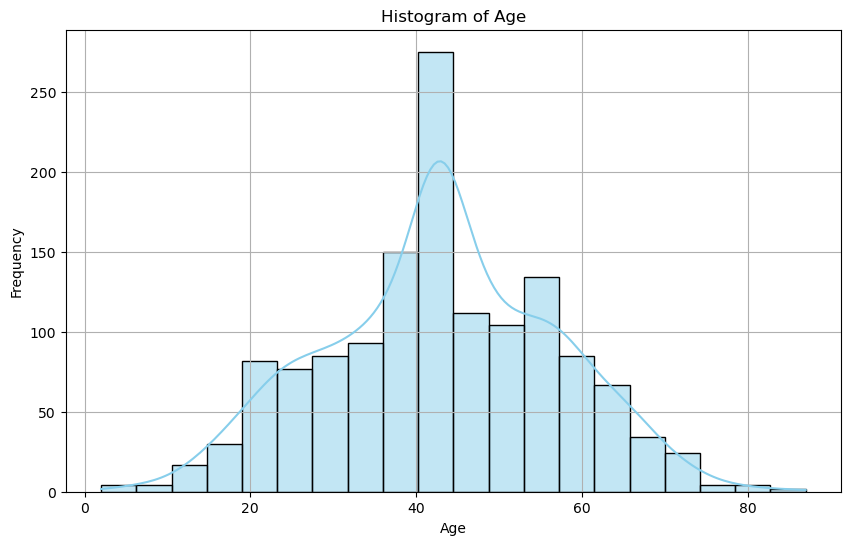

In [340]:
import seaborn as sns

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, color='skyblue', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

According to the this Figure the Age varible are distributted as normally.

Final    1    2
ICU            
1.0     15   26
2.0    444  902


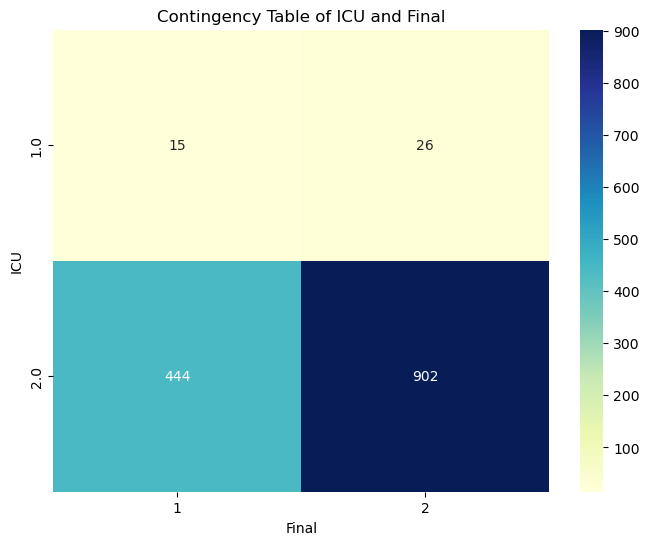

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ICU' and 'Final' are the column names in your DataFrame

# Create the contingency table
contingency_table = pd.crosstab(df_cleaned['ICU'], df_cleaned['Final'])

# Display the contingency table
print(contingency_table)



# Plot the heatmap of the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table of ICU and Final')
plt.xlabel('Final')
plt.ylabel('ICU')
plt.show()

### Standeried the follwong continuous varibles

In [342]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is already defined and populated

# Step 1: Define the columns to be standardized
continuous_vars = ['Age']

# Step 2: Get the list of columns between 'PRad' and 'WBC_first_day'
cols_between = df_cleaned.loc[:, 'PRad':'WBC_first_day'].columns.tolist()

# Step 3: Exclude 'Bleedingad' from these columns
cols_between.remove('Bleedingad')

# Step 4: Combine 'Age' with the filtered columns
continuous_vars.extend(cols_between)

# Step 5: Initialize the StandardScaler
scaler = StandardScaler()

# Step 6: Standardize the selected columns
df_cleaned[continuous_vars] = scaler.fit_transform(df_cleaned[continuous_vars])

# Step 7: Verify the result (optional)
df_cleaned.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate,Final
0,2018,11,7,1,2.0,2.0,2.0,0.721126,3.0,1.0,...,1.285072,2.689185,0.196891,1.643845,3.0,3.0,3.0,3.0,2,2
1,2018,1,7,1,2.0,2.0,1.0,-1.864860,2.0,1.0,...,-0.129937,-0.169752,-0.084702,0.489408,1.0,3.0,3.0,3.0,2,1
2,2018,5,7,1,2.0,2.0,1.0,0.290128,2.0,1.0,...,-0.129937,-0.169752,-0.084702,-0.087810,3.0,3.0,3.0,3.0,2,2
3,2018,1,7,1,2.0,2.0,1.0,-1.577528,2.0,1.0,...,-0.129937,-0.169752,-0.084702,2.221063,3.0,3.0,3.0,3.0,2,2
4,2016,8,7,1,2.0,1.0,1.0,0.002797,2.0,1.0,...,-0.129937,-0.169752,-0.084702,-0.087810,3.0,3.0,3.0,3.0,98,2


In [343]:
import pygwalker as pyg
gwalker = pyg.walk(df_cleaned)

Box(children=(HTML(value='<div id="ifr-pyg-11" style="height: auto">\n    <head>\n        <meta http-equiv="Co…

In [344]:
df_train = df_cleaned.copy()

In [345]:
df_train.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate,Final
0,2018,11,7,1,2.0,2.0,2.0,0.721126,3.0,1.0,...,1.285072,2.689185,0.196891,1.643845,3.0,3.0,3.0,3.0,2,2
1,2018,1,7,1,2.0,2.0,1.0,-1.864860,2.0,1.0,...,-0.129937,-0.169752,-0.084702,0.489408,1.0,3.0,3.0,3.0,2,1
2,2018,5,7,1,2.0,2.0,1.0,0.290128,2.0,1.0,...,-0.129937,-0.169752,-0.084702,-0.087810,3.0,3.0,3.0,3.0,2,2
3,2018,1,7,1,2.0,2.0,1.0,-1.577528,2.0,1.0,...,-0.129937,-0.169752,-0.084702,2.221063,3.0,3.0,3.0,3.0,2,2
4,2016,8,7,1,2.0,1.0,1.0,0.002797,2.0,1.0,...,-0.129937,-0.169752,-0.084702,-0.087810,3.0,3.0,3.0,3.0,98,2


## Part B

### Fit the suitable model for the Data Set

#### Split data set into Predictive varible and explanatory variables

In [346]:
x_train = df_train.drop(['Final'], axis=1)
y_train = df_train['Final']

### Choose the model to train data set

#### The Final varible has only binary values therefore use Logistic Regression to train this model

In [347]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

RandomForestClassifier()

### Get the prediction to the own data using the train model

In [348]:
# Identify all column names
all_columns = df_train.columns.tolist()

# Exclude the 'Final' column
cols_1 = [col for col in all_columns if col != 'Final']
x_test_1 = df_train[cols_1]

In [349]:
predictions_1 = model.predict(x_test_1)
predict = predictions_1.astype(int)
predict

array([2, 1, 2, ..., 2, 2, 1])

In [350]:
print("Size of array:", predict.size)

Size of array: 1387


### Testing the accuray in own data and predictive data

In [351]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming `df_cleaned` is your cleaned DataFrame and `predict` is your predictions array

# Ensure the lengths match
if len(predict) != len(df_cleaned['Final']):
    raise ValueError("The length of the predictions does not match the length of the 'Final' column in df_cleaned.")

# Calculate accuracy
accuracy = accuracy_score(df_cleaned['Final'], predict)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, save the predictions with actual values to a CSV file for further analysis
df_results = pd.DataFrame({
    'ID': df_cleaned.index,  # Assuming index is the ID or you can use df_cleaned['ID'] if exists
    'Actual': df_cleaned['Final'],
    'Predicted': predict
})

df_results.to_csv('predictions_comparison.csv', index=False)
print("Results saved to predictions_comparison.csv")

Accuracy: 0.99
Results saved to predictions_comparison.csv


## Part C

### Import the test data set

In [352]:
df_test = pd.read_csv(r'D:\UOC FOS\Degree Programe\Applied Statistics Hons Degree Programm\Level 4\Sem 1\Statistics\ST 4035\Week 01\Assigment\test.csv', encoding='latin1')

In [353]:
df_test.head()

,ï..Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc
0,1280,2017,6,1,1,2,2,1,49,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1281,2017,6,1,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283,2017,6,1,1,2,2,1,51,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1287,2017,6,1,1,2,2,2,37,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1297,2017,6,1,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select the colums that cotain in df_train data frame 

In [354]:
# Identify all column names in df_train excluding 'Final'
train_columns = [col for col in df_train.columns if col != 'Final']

# Select the same columns from df_test
df_test_selected = df_test[train_columns]

In [355]:
df_test_selected.head() 

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,ALT,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate
0,2017,6,1,1,2,2,1,49,2,2,...,99.0,99.0,99.0,99.0,2,3,1,99,99,2
1,2017,6,1,1,2,2,1,47,2,1,...,160.0,99.0,88.4,8.0,1,3,99,99,99,2
2,2017,6,1,1,2,2,1,51,1,1,...,99.0,99.0,99.0,99.0,99,3,99,99,99,2
3,2017,6,1,1,2,2,2,37,2,1,...,99.0,99.0,99.0,99.0,2,2,99,99,99,1
4,2017,6,1,1,2,1,1,99,99,99,...,99.0,99.0,99.0,99.0,99,3,99,1,99,2


#### Replace the (99) as missing value

In [356]:
cols_to_replace = df_test_selected.columns[df_test_selected.isin(['99', 99, 99.0]).any()].tolist()
cols_to_replace = [col for col in cols_to_replace if col != 'ID']
df_test_selected[cols_to_replace] = df_test_selected[cols_to_replace].replace(['99', 99, 99.0], np.nan)

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_16848\1693292488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_selected[cols_to_replace] = df_test_selected[cols_to_replace].replace(['99', 99, 99.0], np.nan)


In [357]:
df_test_selected.head() 

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,ALT,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate
0,2017,6,1,1,2.0,2.0,1.0,49.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,3.0,1.0,NaN,NaN,2
1,2017,6,1,1,2.0,2.0,1.0,47.0,2.0,1.0,...,160.0,NaN,88.4,8.0,1.0,3.0,NaN,NaN,NaN,2
2,2017,6,1,1,2.0,2.0,1.0,51.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2
3,2017,6,1,1,2.0,2.0,2.0,37.0,2.0,1.0,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1
4,2017,6,1,1,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,2


#### Replce the missing value using replace values in df_cleaned data frame beacuse the test data is part of the original data set

In [358]:
import numpy as np
from scipy.stats import normaltest

def replace_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            # For categorical columns, replace missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif np.issubdtype(df[col].dtype, np.number):
            # For numerical columns
            if df[col].count() >= 8:
                # Check if there are enough non-null samples for the test
                if normaltest(df[col].dropna())[1] < 0.05:
                    # If data doesn't follow a normal distribution, replace with median
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    # Otherwise, replace with mean
                    df[col].fillna(df[col].mean(), inplace=True)
            else:
                # If there are less than 8 non-null samples, replace with median
                df[col].fillna(df[col].median(), inplace=True)
    return df

# Replace missing values for df_test_selected
df_test_selected = replace_missing(df_test_selected)

df_test_selected.head()

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_16848\2744014841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Tharuka\AppData\Local\Temp\ipykernel_16848\2744014841.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1667: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\ProgramData\Anaconda3\lib\site-pa

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,ALT,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate
0,2017,6,1,1,2.0,2.0,1.0,49.000000,2.0,2.0,...,43.0,15.2,102.0,12.0,2.0,3.0,1.0,3.0,3.0,2
1,2017,6,1,1,2.0,2.0,1.0,47.000000,2.0,1.0,...,160.0,15.2,88.4,8.0,1.0,3.0,3.0,3.0,3.0,2
2,2017,6,1,1,2.0,2.0,1.0,51.000000,1.0,1.0,...,43.0,15.2,102.0,12.0,4.0,3.0,3.0,3.0,3.0,2
3,2017,6,1,1,2.0,2.0,2.0,37.000000,2.0,1.0,...,43.0,15.2,102.0,12.0,2.0,2.0,3.0,3.0,3.0,1
4,2017,6,1,1,2.0,1.0,1.0,45.128289,2.0,1.0,...,43.0,15.2,102.0,12.0,4.0,3.0,3.0,1.0,3.0,2


In [359]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is already defined and populated

# Step 1: Define the columns to be standardized
continuous_vars = ['Age']

# Step 2: Get the list of columns between 'PRad' and 'WBC_first_day'
cols_between = df_test_selected.loc[:, 'PRad':'WBC_first_day'].columns.tolist()

# Step 3: Exclude 'Bleedingad' from these columns
cols_between.remove('Bleedingad')

# Step 4: Combine 'Age' with the filtered columns
continuous_vars.extend(cols_between)

# Step 5: Initialize the StandardScaler
scaler = StandardScaler()

# Step 6: Standardize the selected columns
df_test_selected[continuous_vars] = scaler.fit_transform(df_test_selected[continuous_vars])

# Step 7: Verify the result (optional)
df_test_selected.head()

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_16848\3208823851.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_selected[continuous_vars] = scaler.fit_transform(df_test_selected[continuous_vars])


,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Prophylactics,Pasttreatments,...,ALT,T.Bilirubin,S.creatinine,B.urea,WBC_first_day,WPqPCRDiagnosis,UrineqPCRDiagnosis,CultureqPCRDia,SerumqPCRDiagnosis,Isolate
0,2017,6,1,1,2.0,2.0,1.0,0.294756,2.0,2.0,...,-0.159491,-0.161544,-0.210010,-0.228703,-1.181642,3.0,1.0,3.0,3.0,2
1,2017,6,1,1,2.0,2.0,1.0,0.142495,2.0,1.0,...,1.682527,-0.161544,-0.376643,-0.508554,-1.736487,3.0,3.0,3.0,3.0,2
2,2017,6,1,1,2.0,2.0,1.0,0.447018,1.0,1.0,...,-0.159491,-0.161544,-0.210010,-0.228703,-0.071954,3.0,3.0,3.0,3.0,2
3,2017,6,1,1,2.0,2.0,2.0,-0.618813,2.0,1.0,...,-0.159491,-0.161544,-0.210010,-0.228703,-1.181642,2.0,3.0,3.0,3.0,1
4,2017,6,1,1,2.0,1.0,1.0,0.000000,2.0,1.0,...,-0.159491,-0.161544,-0.210010,-0.228703,-0.071954,3.0,3.0,1.0,3.0,2


In [360]:
df_test_selected.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 158 entries, Year to Isolate
dtypes: float64(153), int64(5)
memory usage: 428.5 KB


### Predict the values of Test Data set

In [361]:
# Empty list to store column names
cols = []

# Assign all column names from df_test_selected to cols
cols = df_test_selected.columns.tolist()
x_test = df_test_selected[cols]

In [362]:
predictions = model.predict(x_test)
predict = predictions.astype(int)
predict

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,

#### Save the Predict values into CSV file

In [363]:
df_p = pd.read_csv(r'D:\UOC FOS\Degree Programe\Applied Statistics Hons Degree Programm\Level 4\Sem 1\Statistics\ST 4035\Week 01\Assigment\sample_submission.csv', encoding='latin1')

df_predict = pd.DataFrame(predict, index=df_p['ID'], columns=['Final'])

# Save the DataFrame to a CSV file
df_predict.to_csv('predictions_Final_RF_C.csv')